In [3]:
import numpy as np
import matplotlib.pyplot as plt


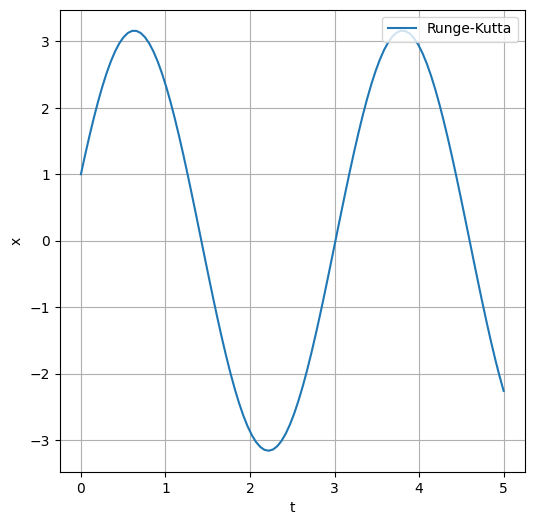

<Figure size 640x480 with 0 Axes>

In [4]:
# Runge-Kutta exemplo 1: Lançamento com arrasto quadrático e comparação com solução Euler

omega2 = 4

def f(x):
    return -omega2*x



n_pontos = 100
t_final = 5.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/n_pontos
x_0 = 1
v_0 = 6

x = [x_0]
v = [v_0]



for i in range(len(t)-1):
    
    F1 = [ v[i],f(x[i])]
    
    x_ = 0.5*delta_t*F1[0]+x[i]
    v_ = 0.5*delta_t*F1[1]+v[i]
    F2 = [v_,f(x_)]
    
    x_ = 0.5*delta_t*F2[0]+x[i]
    v_ = 0.5*delta_t*F2[1]+v[i]
    F3 = [v_,f(x_)]
    
    x_ = delta_t*F3[0]+x[i]
    v_ = delta_t*F3[1]+v[i]
    F4 = [v_,f(x_)]
    
    
    
    s = x[i] +  delta_t * (F1[0]+2*F2[0]+2*F3[0]+F4[0]) / 6
    x.append(s)

    s = v[i] +  delta_t * (F1[1]+2*F2[1]+2*F3[1]+F4[1]) / 6
    v.append(s)

    
    
    
plt.figure(figsize=(6, 6))     
    
plt.xlabel("t")
plt.ylabel("x")
plt.plot(t, x, '-', markersize=2, label='Runge-Kutta')

plt.grid()
plt.legend(loc="upper right")
plt.show()
plt.clf()


[[1.   0.   0.   0.   0.  ]
 [1.   4.25 1.   0.   0.  ]
 [0.   1.   4.25 1.   0.  ]
 [0.   0.   1.   4.25 1.  ]
 [0.   0.   0.   0.   1.  ]]


ValueError: x and y must have same first dimension, but have shapes (101,) and (5,)

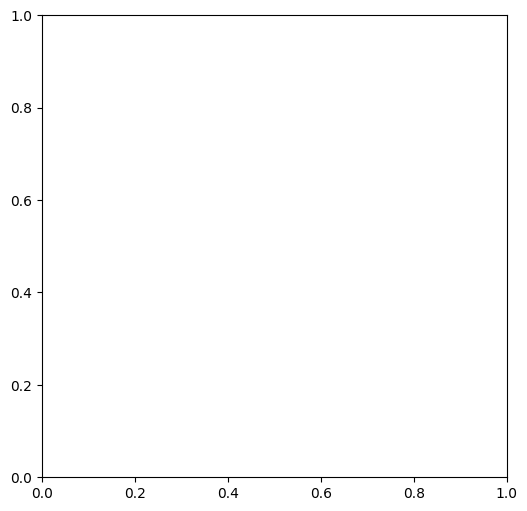

In [27]:
# Oscilador por diferencias finitas


omega2 = 4

n = 4
h = (5-0) / n


# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1 
    A[i, i] = omega2*h**2 - 2
    A[i, i+1] = +1

print(A)

# Get b
b = np.zeros(n+1)
b[1:-1] = 0
b[0] = 1
b[-1] = 1


# solve the linear equations
y = np.linalg.solve(A, b)

t = np.linspace(0, 5, 101)

plt.figure(figsize=(6,6))
plt.plot(t, y)
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.grid()
plt.show()

In [44]:
# Expansão em série de cossenos
# Pesos e pontos de colocação 

def func(x):
     return np.cos(x)
    #return 2*np.cos(1*x)+3*np.cos(2*x)+4*np.cos(3*x)+5*np.cos(4*x)+6*np.cos(5*x)

n = 10
t = np.zeros(shape=(n))  

for i in range(n):
    t[i] = np.pi*(i+0.5)/n


w = np.zeros(shape=(n))
for i in range(n):
    for j in range(n):
            w[i] = w[i] + func(t[j])*np.cos(i*t[j])

    w[i] = 2*w[i]/n

w[0] = w[0]/2

print(w)



[ 1.11022302e-17  1.00000000e+00  4.44089210e-17 -1.11022302e-16
  1.33226763e-16 -1.11022302e-16 -8.88178420e-17 -6.66133815e-17
  4.44089210e-17 -6.27276009e-16]


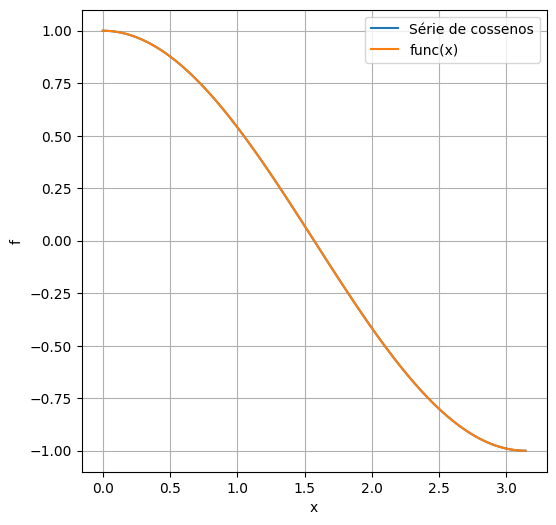

In [46]:
# Teste da expansão em série de cossenos

x = np.linspace(0, np.pi, 100)
y = np.zeros(shape=(100))
for i in range(100):
    for j in range(n):
        y[i] = y[i] + w[j]*np.cos(j*x[i])

plt.figure(figsize=(6,6))
plt.plot(x, y, label='Série de cossenos')
plt.plot(x, func(x), label='func(x)')
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
plt.grid()
plt.show()

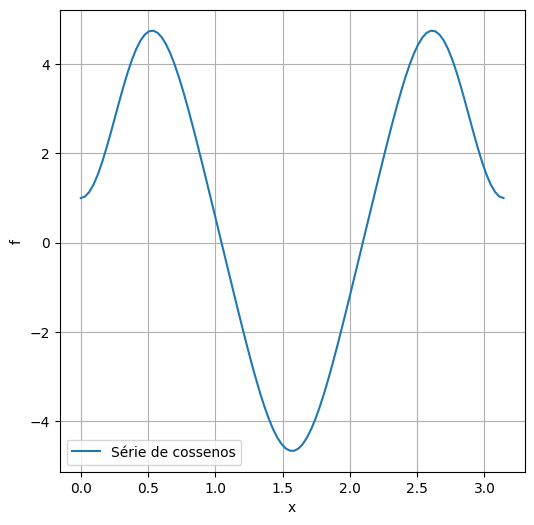

In [57]:
# Método de colocação

omega2 = 9

n = 10
t = np.zeros(shape=(n))  

for i in range(n):
    t[i] = np.pi*(i)/(n-1)


M = np.zeros(shape=(n,n))

for j in range(n):
    M[0,j] = np.cos(j*t[0])
for i in range(1,n-1):
    for j in range(n):
            M[i,j] = (-j**2+omega2)*np.cos(j*t[i])
for j in range(n):
    M[n-1,j] = np.cos(j*t[n-1])


b = np.zeros(n)
for i in range(n):
    b[i] = 0
b[0] = 1
b[-1] = 1   

#print(M)

w = np.linalg.solve(M, b)


# Teste da expansão em série de cossenos

x = np.linspace(0, np.pi, 100)
y = np.zeros(shape=(100))
for i in range(100):
    for j in range(n):
        y[i] = y[i] + w[j]*np.cos(j*x[i])

plt.figure(figsize=(6,6))
plt.plot(x, y, label='Série de cossenos')
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
plt.grid()
plt.show()



